In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import data_set
import clustering
import fit_to_external_classification
import predict_nuber_of_clusters

In [18]:
from importlib import reload

reload(data_set)
reload(clustering)
reload(predict_nuber_of_clusters)
reload(fit_to_external_classification)

<module 'fit_to_external_classification' from '/home/davidross/Documents/Unsupervised/classification-master/fit_to_external_classification.py'>

In [5]:
def get_data(filenames) -> list[nx.classes.graph.Graph]:
    r"""Getting the gas data.
    Return types:
        * **graphs** *(List of dataFrames)*.
    """
    data = []
    for file in filenames:
        path = "/home/davidross/Downloads/driftdataset/" + file
        data.append(pd.read_csv(path, encoding="utf8", sep="\n"))
          
    return data

In [6]:
from os import walk

path = "/home/davidross/Downloads/driftdataset"
filenames = next(walk(path), (None, None, []))[2]  # [] if no file

In [7]:
def parse(d):
    dictionary = dict()
    # Removes curly braces and splits the pairs into a list
    pairs = d.split()
    
    idx = pairs.pop(0)
    target = idx.split(';')
    
    for i in pairs:
        pair = i.split(':')
        # Other symbols from the key-value pair should be stripped.
        dictionary[pair[0]] = pair[1]
    return dictionary, target

In [8]:
dic_list = []
targets = []

for file in filenames:
    path = "/home/davidross/Downloads/driftdataset/" + file
    data_file = open(path, 'rt')
    lines = data_file.read().split('\n')
    for l in lines:
        if l != '':
            dic, target = parse(l)
            dic_list.append(dic)
            targets.append(target)
         
    data_file.close()

In [9]:
data = pd.DataFrame(dic_list)
target = pd.DataFrame(targets)
target = target.astype({1:'float'})

In [10]:
data.to_csv('gas_drift.csv', encoding='utf-8', index=False)
target.to_csv('gas_target.csv', encoding='utf-8', index=False)

In [11]:
data_set_number = 3

In [12]:
dataset, density = data_set.prepare_data_set3()

In [ ]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=dataset.drop('Target', axis=1))
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

In [92]:
import hdbscan

clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(dataset.drop('Target', axis=1))

/tmp/ipykernel_4204/3850962857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)


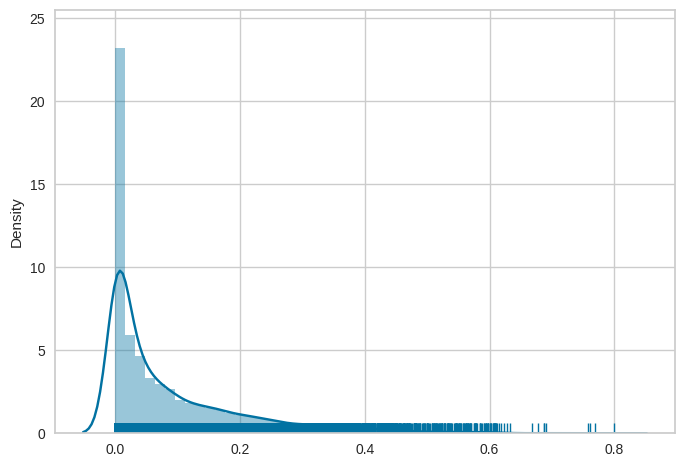

In [93]:
import seaborn as sns

sns.distplot(clusterer.outlier_scores_[np.isfinite(clusterer.outlier_scores_)], rug=True)
plt.savefig('distplot.png')

In [17]:
threshold = pd.Series(clusterer.outlier_scores_).quantile(0.9)
outliers = np.where(clusterer.outlier_scores_ > threshold)[0]

In [18]:
points = np.asarray(dataset.drop('Target', axis=1))

In [19]:
from sklearn.manifold import TSNE

points_red = TSNE(n_components=2).fit_transform(points)

/home/davidross/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/davidross/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
points = scaler.fit_transform(points)
points_red = scaler.fit_transform(points_red)

In [21]:
reg_points = []
anomalous_points = []

reg_points_red = []
anomalous_points_red = []

for i in range(0, len(points)):
    if i in outliers:
        anomalous_points.append(points[i])
        anomalous_points_red.append(points_red[i])
    else: 
        reg_points.append(points[i])
        reg_points_red.append(points_red[i])
        
reg_points = np.asarray(reg_points)
anomalous_points = np.asarray(anomalous_points)

reg_points_red = np.asarray(reg_points_red)
anomalous_points_red = np.asarray(anomalous_points_red)
# print('anomalous: ', anomalous_points, len(anomalous_points))
# print('reg: ', reg_points, len(reg_points))
    
np.savetxt("dataset3_is_anomaly.csv", outliers, delimiter=",")

np.savetxt("dataset3_all_points.csv", points, delimiter=",")
np.savetxt("dataset3_reg_points.csv", reg_points, delimiter=",")
np.savetxt("dataset3_anomalous_points.csv", anomalous_points, delimiter=",")

np.savetxt("dataset3_all_points_red.csv", points_red, delimiter=",")
np.savetxt("dataset3_reg_points_red.csv", reg_points_red, delimiter=",")
np.savetxt("dataset3_anomalous_points_red.csv", anomalous_points_red, delimiter=",")

In [5]:
reg_points = np.genfromtxt("dataset3_reg_points.csv", delimiter=',')
reg_points_red = np.genfromtxt("dataset3_reg_points_red.csv", delimiter=',')
print('len of reg ', len(reg_points))

anomalous_points = np.genfromtxt("dataset3_anomalous_points.csv", delimiter=",")
anomalous_points_red = np.genfromtxt("dataset3_anomalous_points_red.csv", delimiter=",")
print('len of anomalous ', len(anomalous_points))

points = np.genfromtxt("dataset3_all_points.csv", delimiter=",")
points_red = np.genfromtxt("dataset3_all_points_red.csv", delimiter=",")

is_anomaly = np.genfromtxt("dataset3_is_anomaly.csv", delimiter=",")

len of reg  12519
len of anomalous  1391


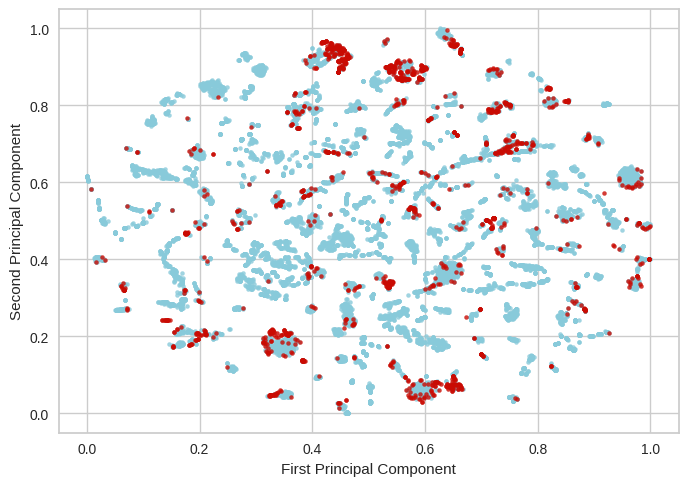

In [6]:
 # plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax.scatter(reg_points_red[:, 0], reg_points_red[:, 1], c='c', alpha=0.8, s=8)
plt.scatter(anomalous_points_red[:, 0], anomalous_points_red[:, 1], c='r', alpha=0.8, s=8)
plt.savefig('tsne_3.png')
plt.show()

real unique labels [0 1 2 3 4 5] 13910


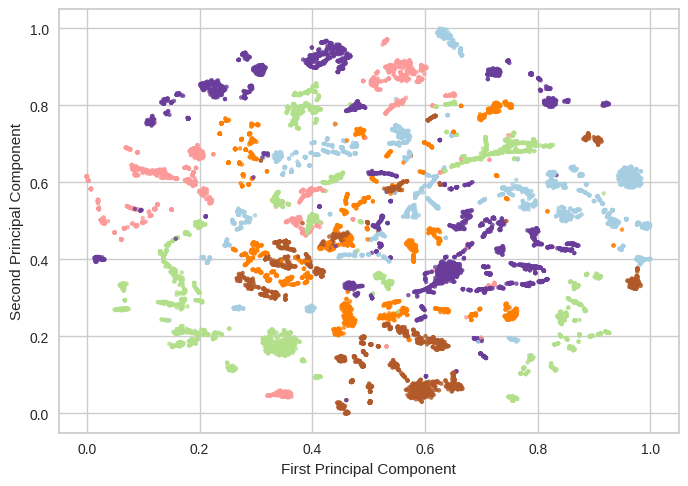

In [147]:
labels = list(dataset['Target'])
fit_to_external_classification.plot_external_tag_distribution(data_set_number, points_red, labels)

In [148]:
for i in sorted(outliers, reverse=True):
    del labels[i]

For n_clusters = 2 The average silhouette_score is : 0.3497403202668029
For n_clusters = 3 The average silhouette_score is : 0.36593208551221834
For n_clusters = 4 The average silhouette_score is : 0.35676869530310146
For n_clusters = 5 The average silhouette_score is : 0.3422785158857239
For n_clusters = 6 The average silhouette_score is : 0.36673143195924607
For n_clusters = 7 The average silhouette_score is : 0.3650942890727302


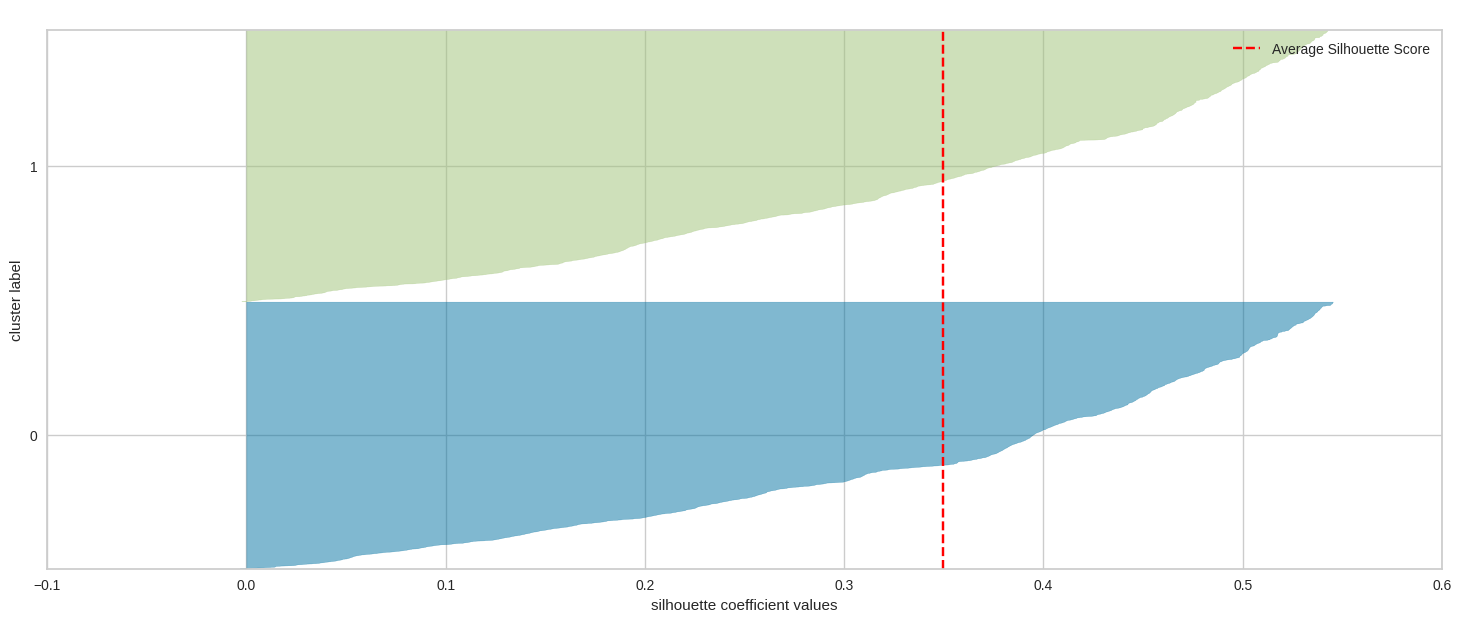

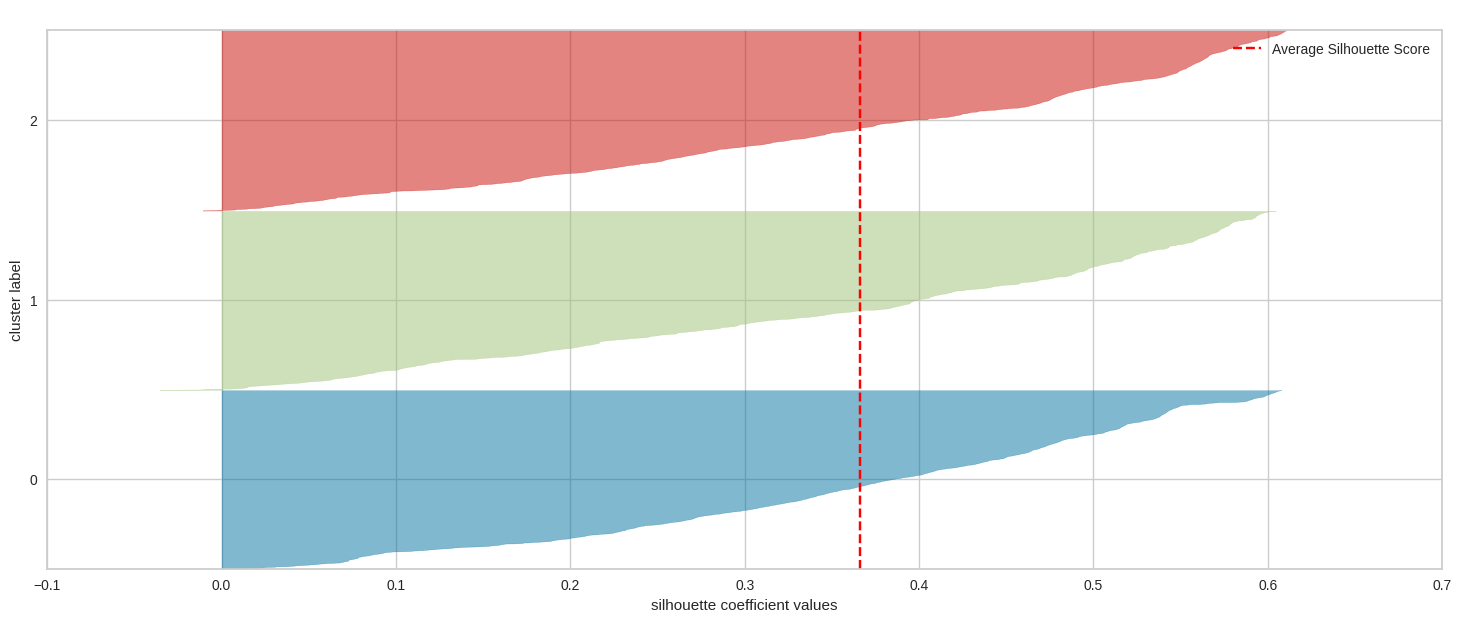

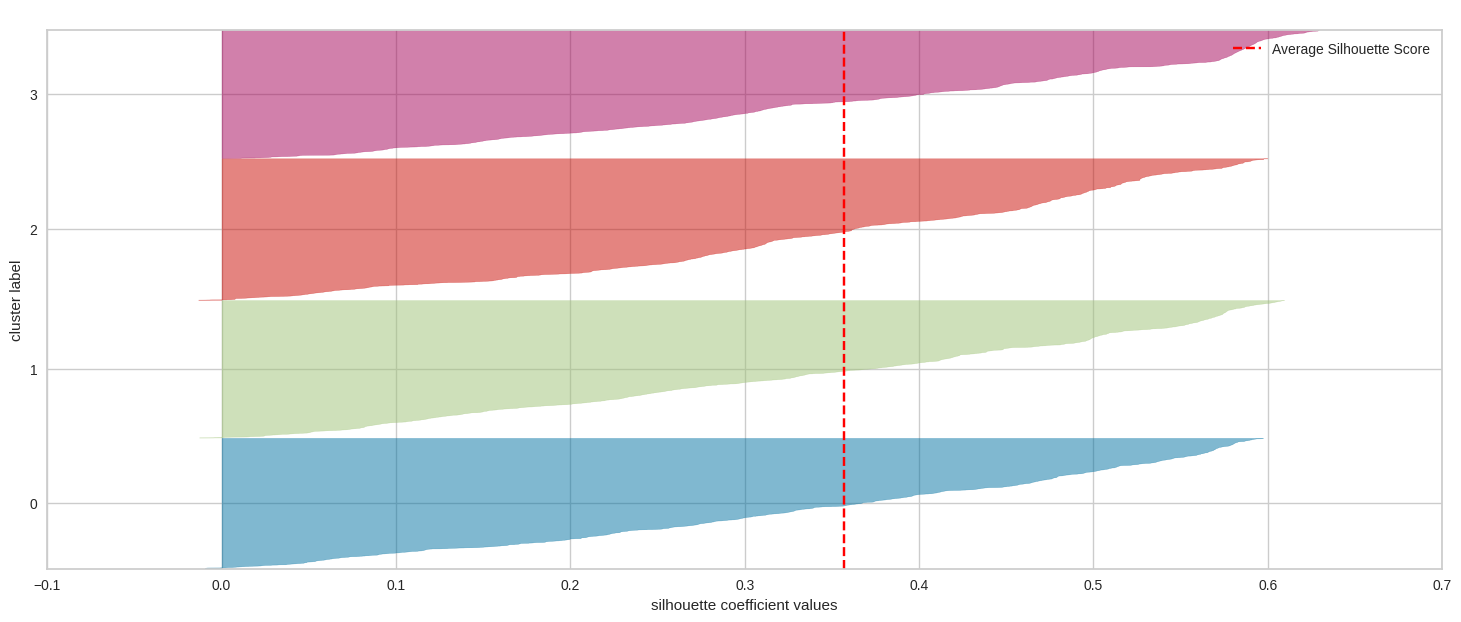

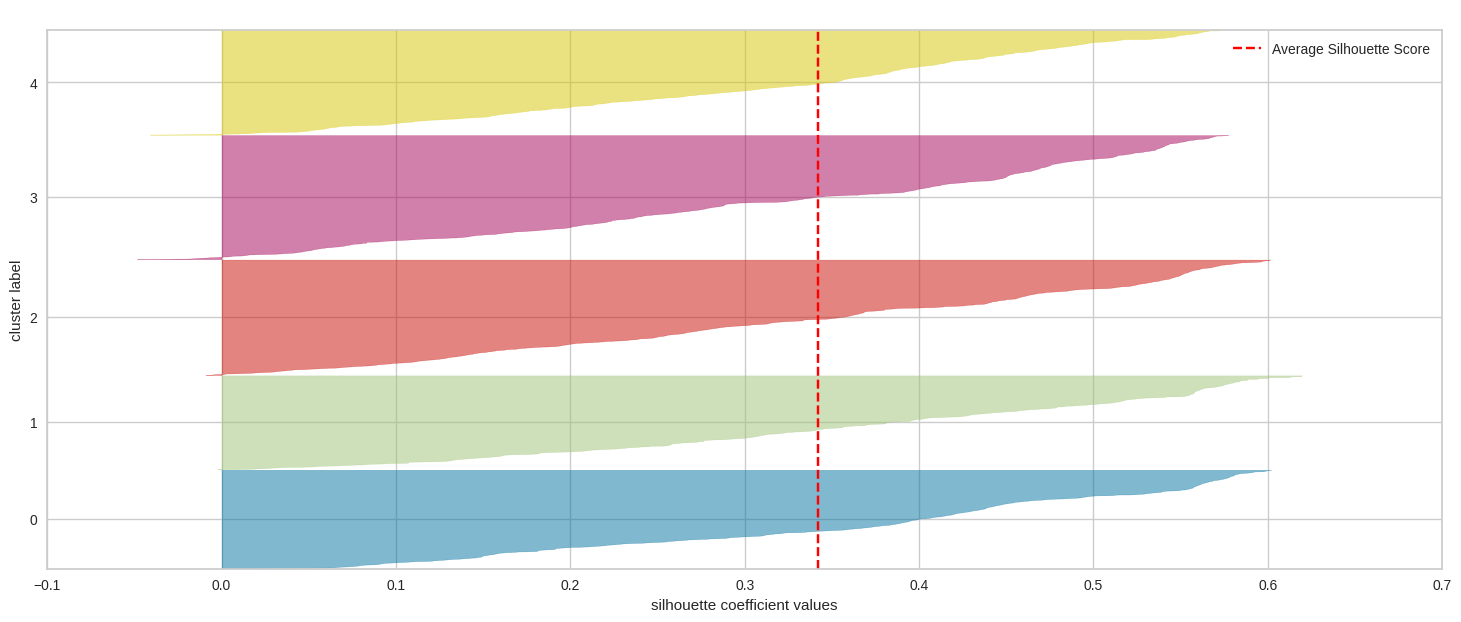

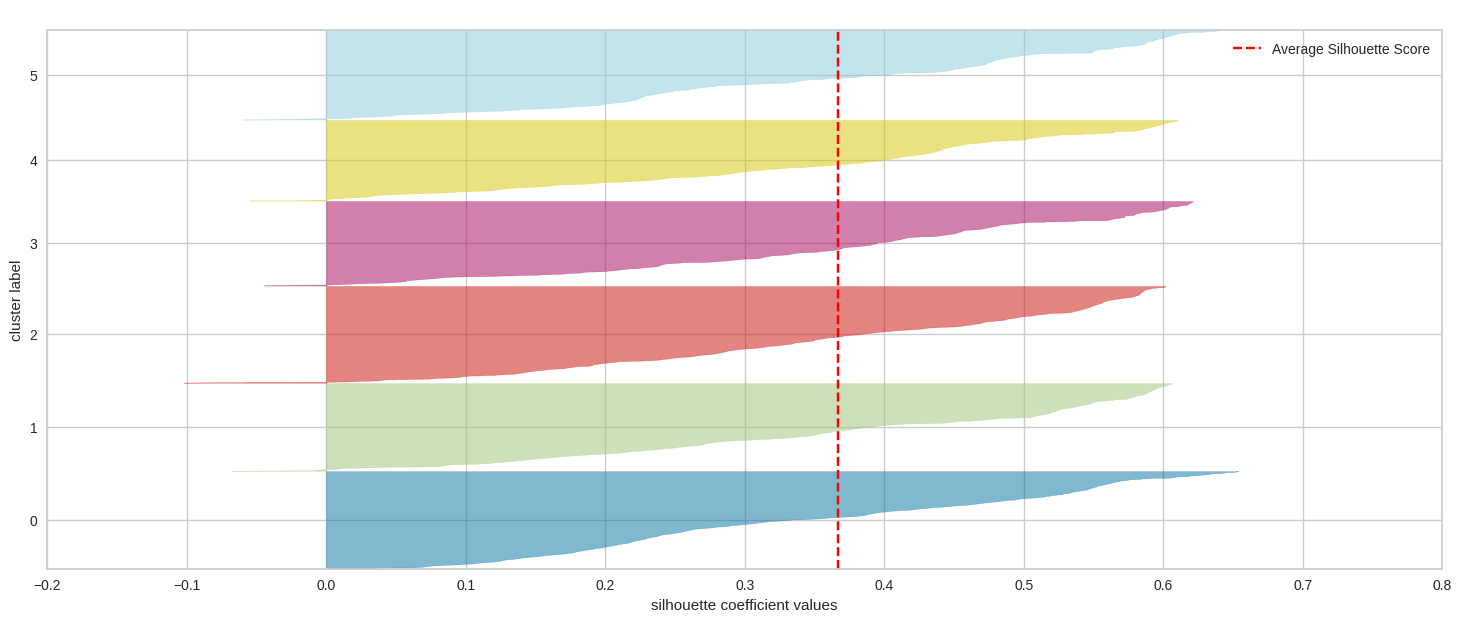

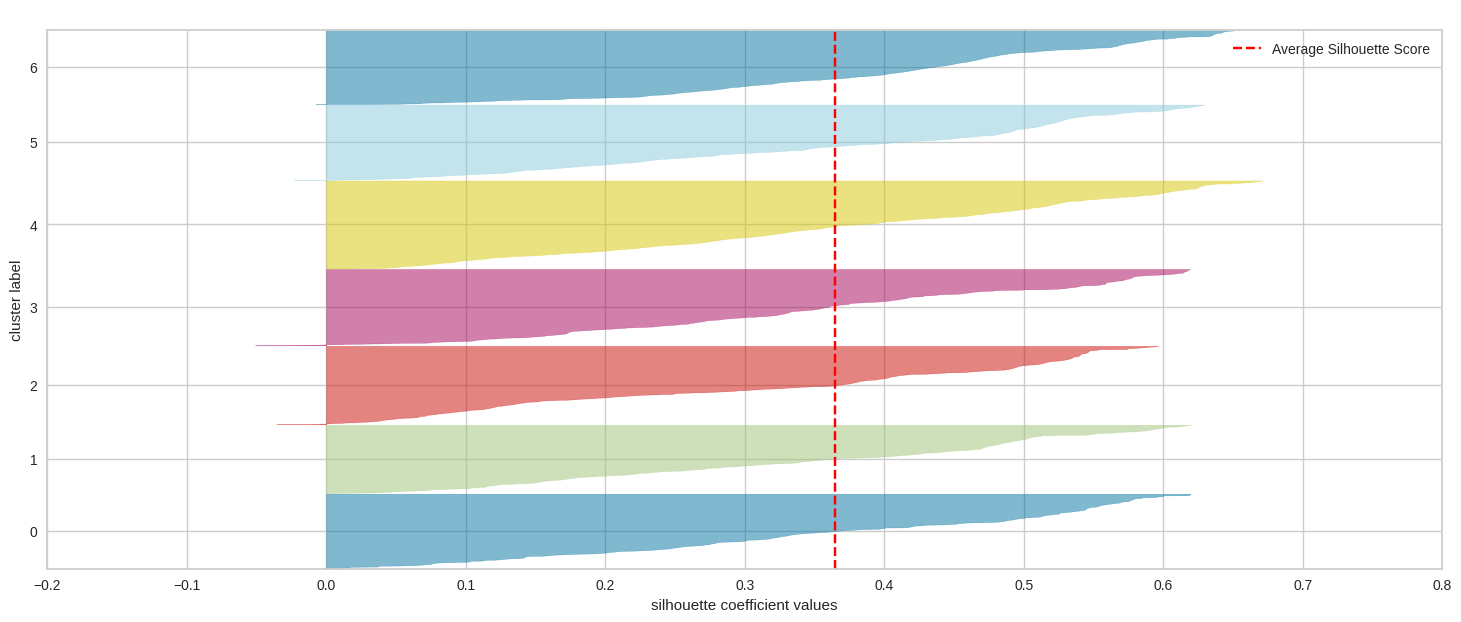

In [96]:
predict_nuber_of_clusters.perform_silhouette_method(reg_points_red, 'K means')

For n_clusters = 2 The average silhouette_score is : 0.33349903761819427
For n_clusters = 3 The average silhouette_score is : 0.3568548324873527
For n_clusters = 4 The average silhouette_score is : 0.3476525023628127
For n_clusters = 5 The average silhouette_score is : 0.3288990403107651
For n_clusters = 6 The average silhouette_score is : 0.34712486447918073
For n_clusters = 7 The average silhouette_score is : 0.2934129641335792


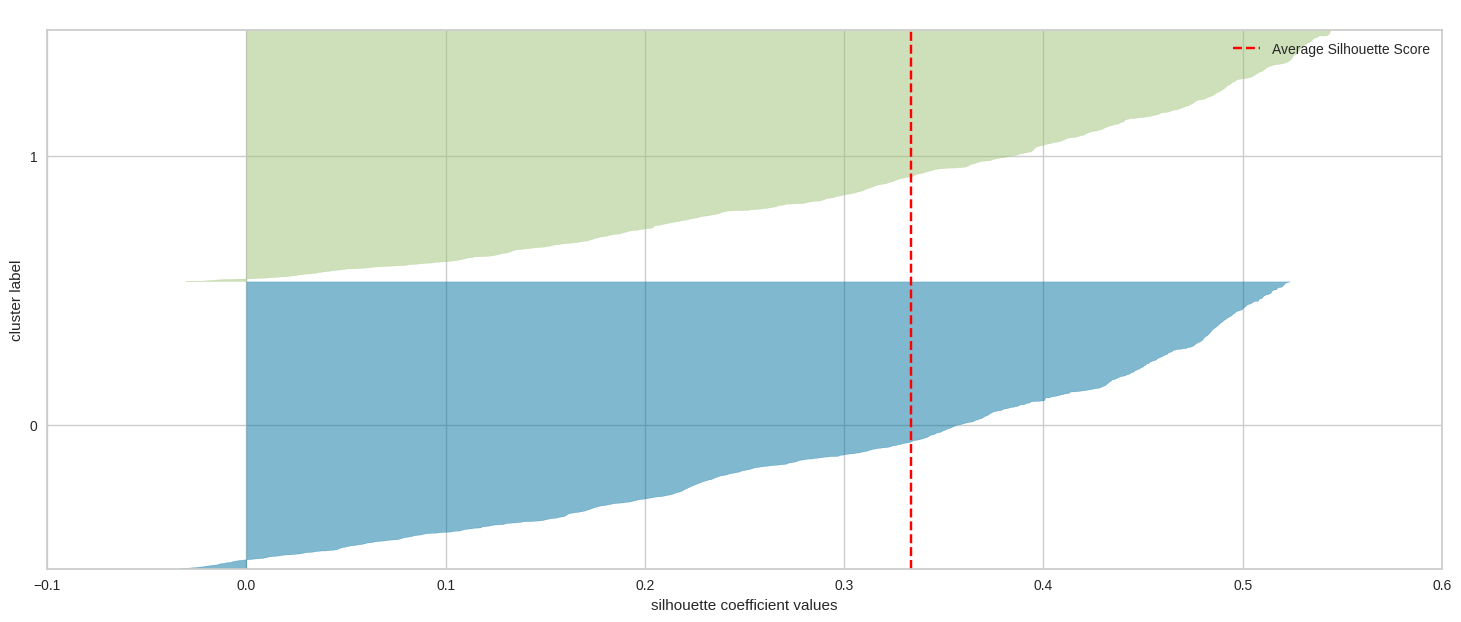

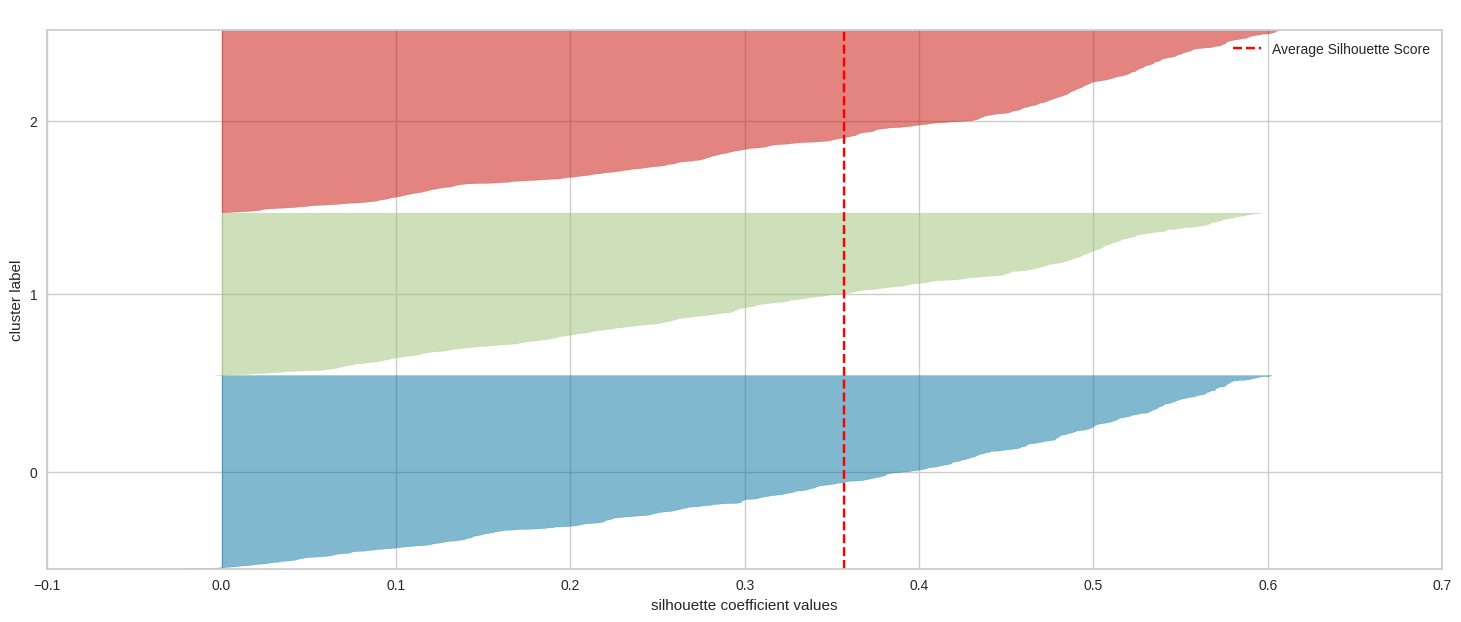

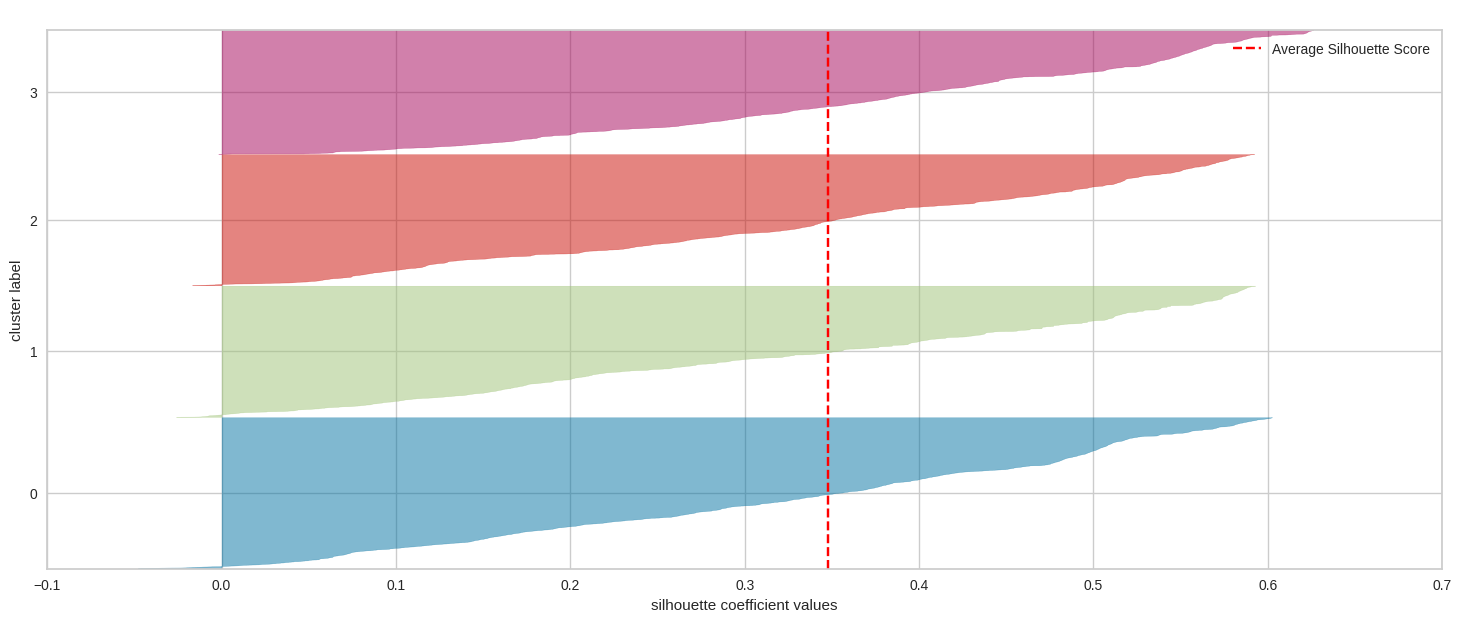

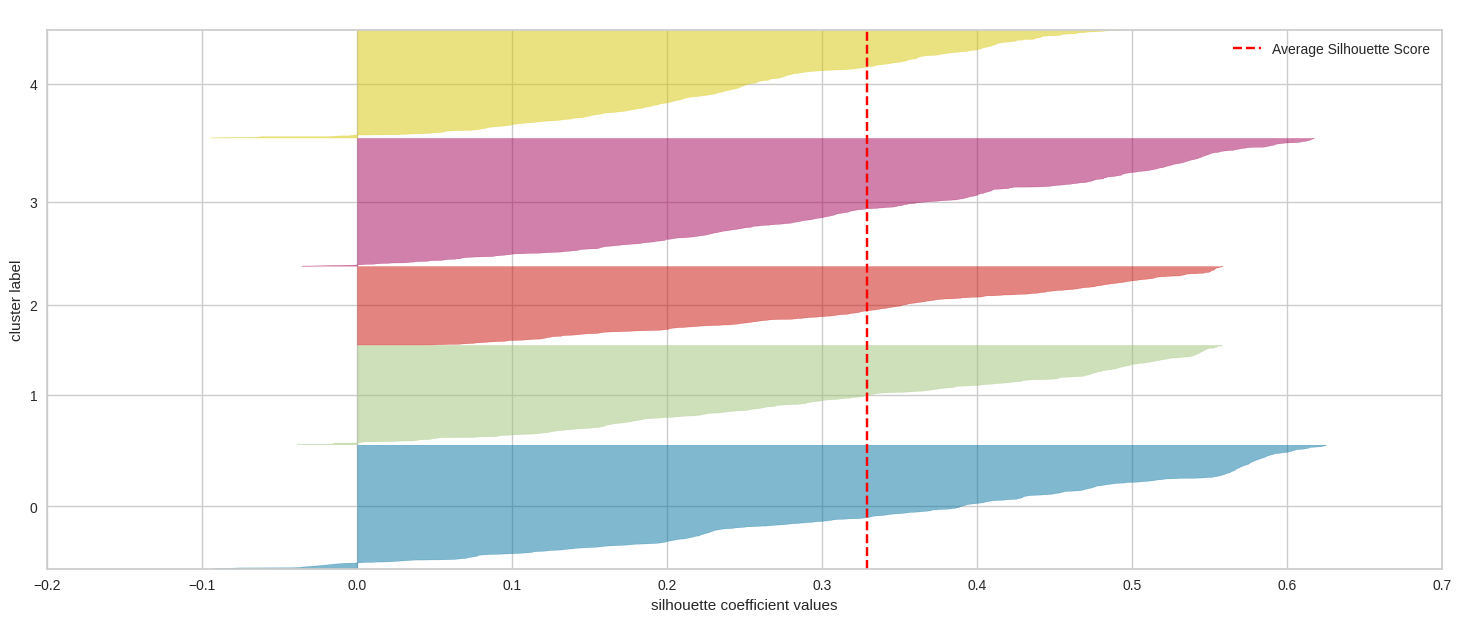

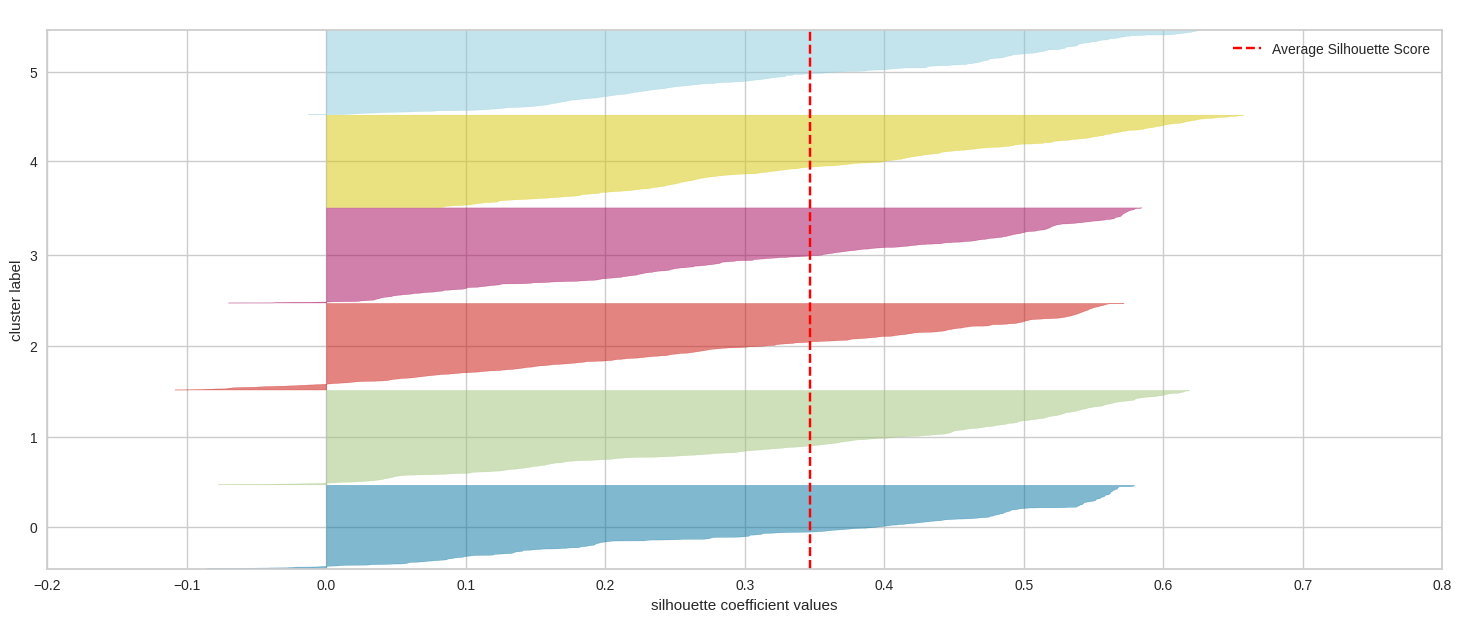

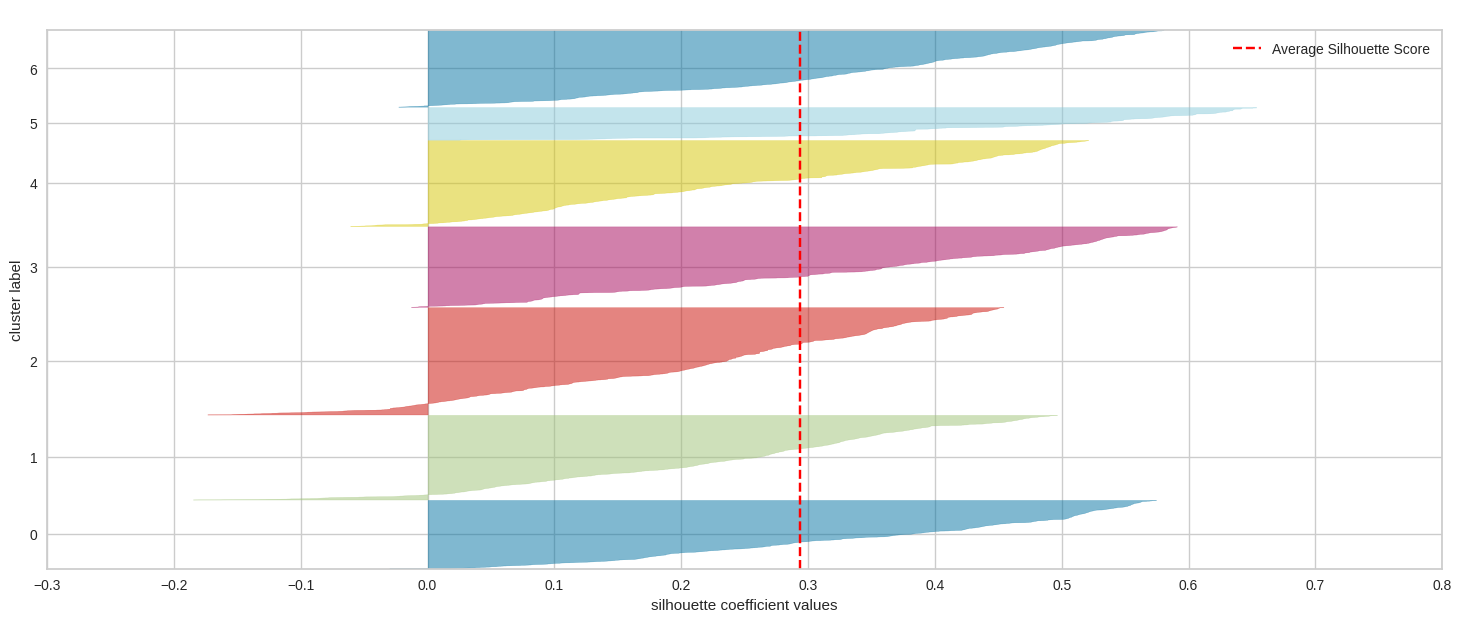

In [97]:
predict_nuber_of_clusters.perform_silhouette_method(reg_points_red, 'MiniBatchKMeans')

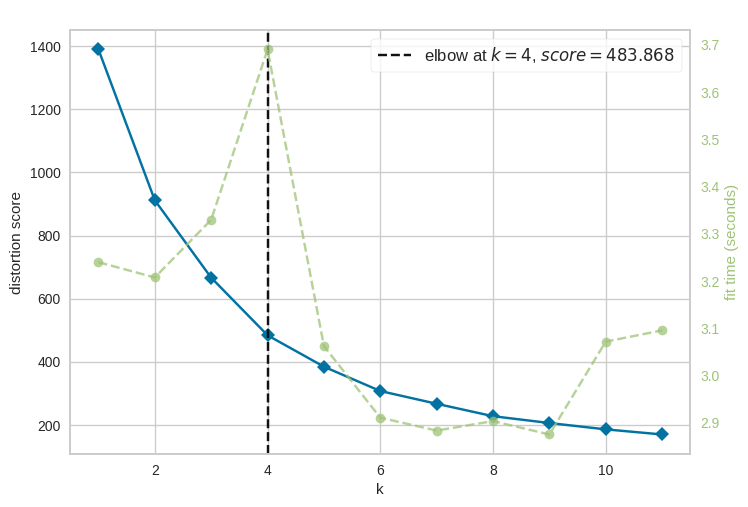

In [29]:
predict_nuber_of_clusters.perform_elbow_method(reg_points_red, 'Hierarchical')

In [31]:
methods = ['K means', 'KMeansMiniBatch', 'Hierarchical']
for method in methods:
    predict_nuber_of_clusters.compare_silhouette_scores(reg_points_red, method)

for K means    :  2 clusters are better than 5 clusters, with p value = 5.62336486326463e-09  <<0.05
for K means    :  3 clusters are better than 2 clusters, with p value = 4.3855962144345e-09  <<0.05
for K means    :  3 clusters are better than 4 clusters, with p value = 1.6098805732752584e-08  <<0.05
for K means    :  3 clusters are better than 5 clusters, with p value = 2.7778667201016353e-08  <<0.05
for K means    :  3 clusters are better than 7 clusters, with p value = 0.013200610783420752  <<0.05
for K means    :  4 clusters are better than 2 clusters, with p value = 2.8867273242514264e-09  <<0.05
for K means    :  4 clusters are better than 5 clusters, with p value = 1.9916542586027992e-08  <<0.05
for K means    :  6 clusters are better than 2 clusters, with p value = 5.633285176862486e-09  <<0.05
for K means    :  6 clusters are better than 4 clusters, with p value = 1.9946648301359424e-08  <<0.05
for K means    :  6 clusters are better than 5 clusters, with p value = 3.3930193

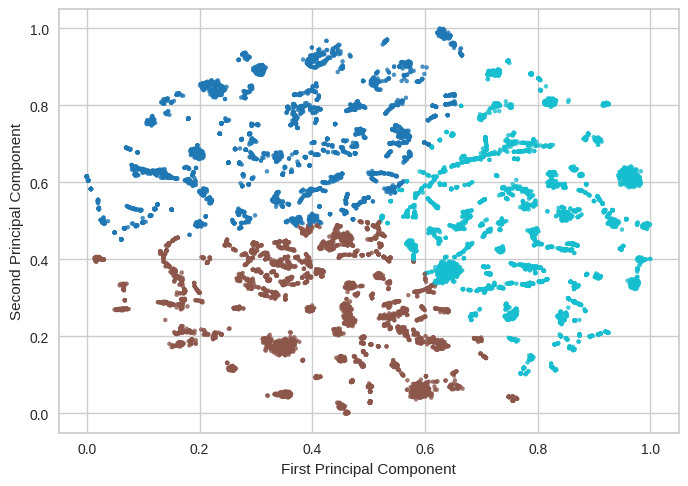

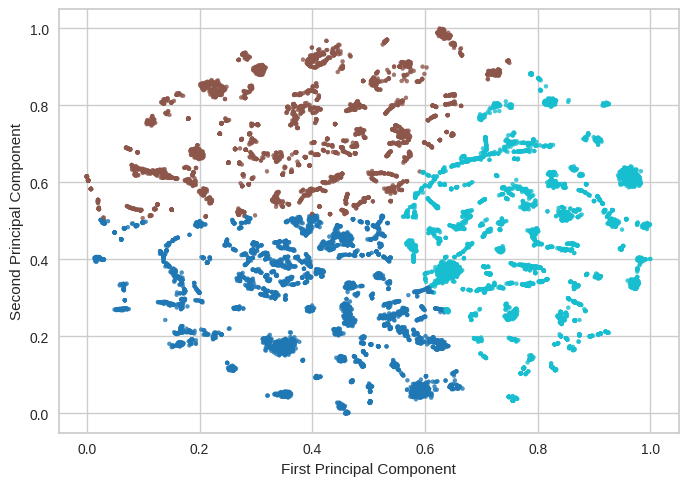

In [118]:
# cluster
clustering.plot_clustering(reg_points_red, clustering.perform_kmeans(reg_points_red, 3), 'K means')
clustering.plot_clustering(reg_points_red, clustering.perform_minibatch(reg_points_red, 3), 'MiniBatchKMeans')

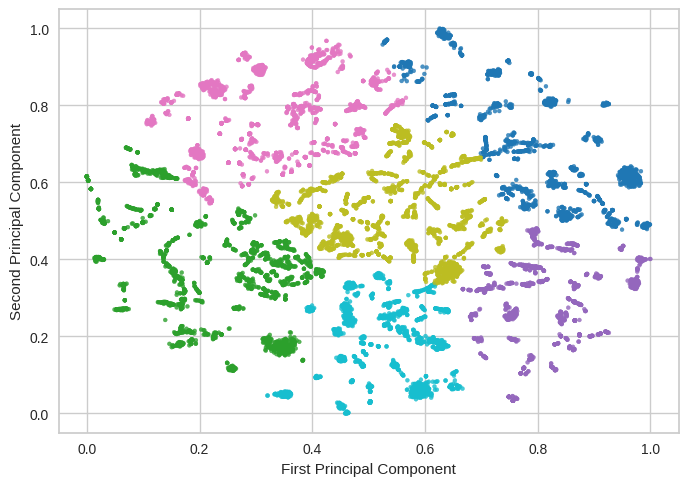

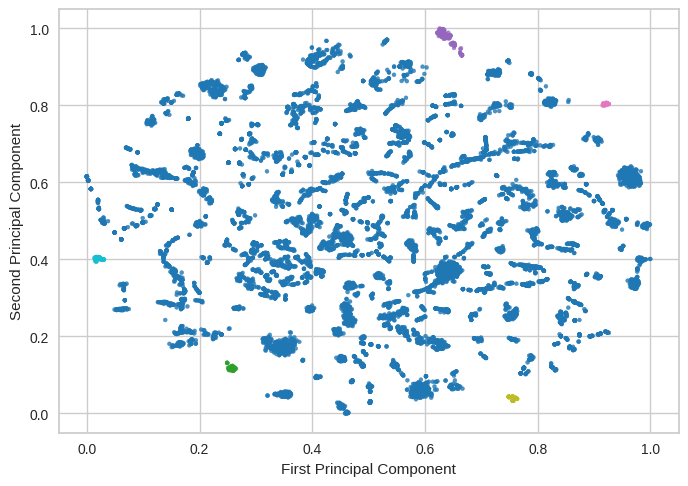

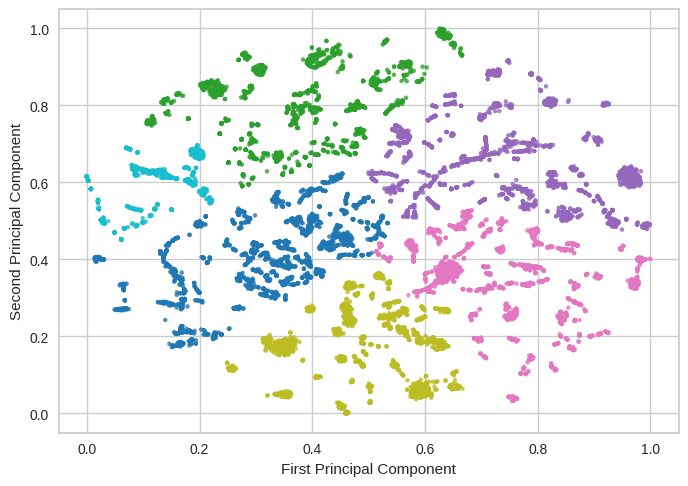

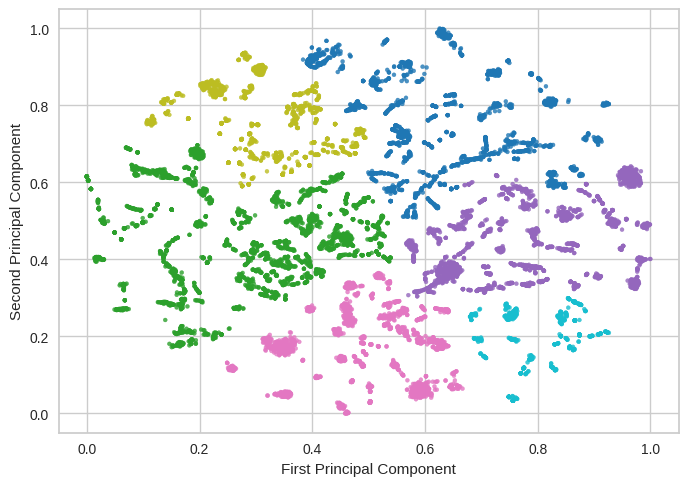

In [119]:
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'ward'), 'Hierarchical-ward')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'single'), 'Hierarchical-single')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'average'), 'Hierarchical-average')
clustering.plot_clustering(reg_points_red, clustering.perform_hierarchical_clustering(reg_points_red, 6, 'complete'), 'Hierarchical-complete')

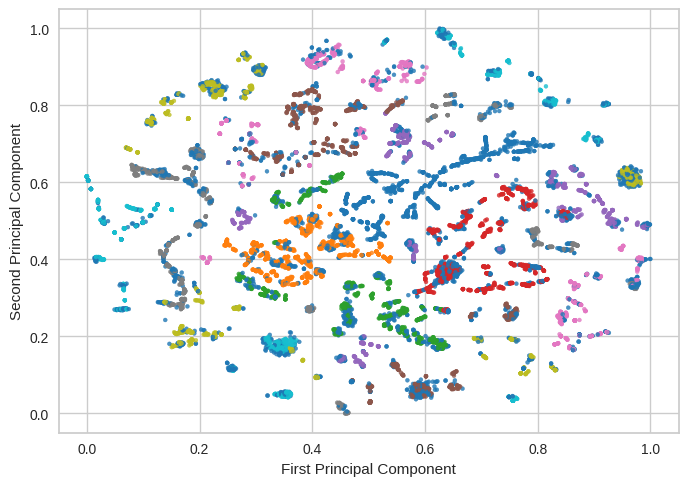

In [99]:
clustering.plot_clustering(reg_points_red, clustering.perform_optics(reg_points_red), 'OPTICS')

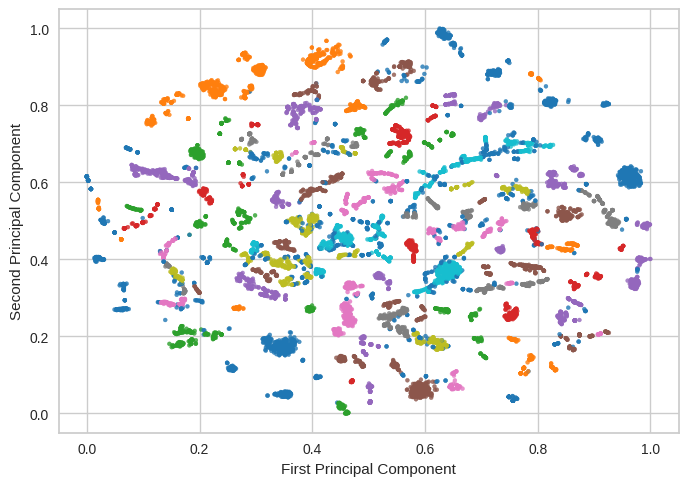

In [100]:
clustering.plot_clustering(reg_points_red, clustering.perform_hdbscan(reg_points_red), 'HDBSCAN')

In [51]:
labels_density = list(density)
for i in sorted(outliers, reverse=True):
    del labels_density[i]

In [52]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(labels_density)
labels_density = le.transform(labels_density)

In [53]:
n_clusters = [len(np.unique(dataset['Target'])), len(np.unique(density))]

In [54]:
predict_nuber_of_clusters.compare_external_variables(reg_points_red, 'K means', n_clusters)

for K means   59 clusters are better than 6 clusters, with p value = 3.38823691698822e-08  <<0.05


In [55]:
nmi_dictionary = {}

In [56]:
nmi_dictionary['Gas Type - KMeans'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=n_clusters[0], method='K Means')

In [59]:
nmi_dictionary['Gas Type - Hierarchical'] = fit_to_external_classification.nmi_score(
        labels, reg_points_red, n_clusters=n_clusters[0], method='Hierarchical')

In [60]:
nmi_dictionary['Concentration - Kmeans'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=n_clusters[1], method='K Means')

In [61]:
nmi_dictionary['Concentration - Hierarchical'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=n_clusters[1], method='Hierarchical')

In [62]:
print('u test')
for key1 in nmi_dictionary:
    for key2 in nmi_dictionary:
        if key1 != key2:
            p_val = fit_to_external_classification.u_test(nmi_dictionary[key1], 
                                                          nmi_dictionary[key2])
            if p_val < 0.05:
                print(key1, 'is significantly better than ', key2, 'with p-value =', p_val, ' <<0.05')
                

u test
Gas Type - Hierarchical is significantly better than  Gas Type - KMeans with p-value = 3.9959368049726934e-09  <<0.05
Concentration - Kmeans is significantly better than  Gas Type - KMeans with p-value = 3.3930193083693134e-08  <<0.05
Concentration - Kmeans is significantly better than  Gas Type - Hierarchical with p-value = 4.003272516972358e-09  <<0.05
Concentration - Hierarchical is significantly better than  Gas Type - KMeans with p-value = 3.9959368049726934e-09  <<0.05
Concentration - Hierarchical is significantly better than  Gas Type - Hierarchical with p-value = 2.341341179371028e-10  <<0.05
Concentration - Hierarchical is significantly better than  Concentration - Kmeans with p-value = 0.04268203319511688  <<0.05


In [63]:
print('Average NMI Scores:')
for key in nmi_dictionary:
    print('for', key, 'the average NMI Score is ', sum(nmi_dictionary[key]) / len(nmi_dictionary[key]))

Average NMI Scores:
for Gas Type - KMeans the average NMI Score is  0.11756740210493136
for Gas Type - Hierarchical the average NMI Score is  0.14540441701998308
for Concentration - Kmeans the average NMI Score is  0.40155687536191476
for Concentration - Hierarchical the average NMI Score is  0.4029643860444068


In [66]:
algorithm_nmi_dictionary = {}

In [67]:
algorithm_nmi_dictionary['HDBSCAN'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=_, method='HDBSCAN')

In [69]:
algorithm_nmi_dictionary['OPTICS'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=_, method='OPTICS')

In [70]:
algorithm_nmi_dictionary['KMeansMiniBatch'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=3, method='KMeansMiniBatch')

In [ ]:
algorithm_nmi_dictionary['KMeans'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=3, method='K Means')

In [ ]:
algorithm_nmi_dictionary['Hierarchical'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points_red, n_clusters=6, method='Hierarchical')

In [73]:
algorithm_nmi_dictionary['HDBSCAN_FULL'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points, n_clusters=_, method='HDBSCAN')

In [74]:
algorithm_nmi_dictionary['OPTICS_FULL'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points, n_clusters=_, method='OPTICS')

In [75]:
algorithm_nmi_dictionary['KMeansMiniBatch_FULL'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points, n_clusters=3, method='KMeansMiniBatch')

In [76]:
algorithm_nmi_dictionary['KMeans_FULL'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points, n_clusters=3, method='K Means')

In [77]:
algorithm_nmi_dictionary['Hierarchical_FULL'] = fit_to_external_classification.nmi_score(
        labels_density, reg_points, n_clusters=6, method='Hierarchical')

In [ ]:
print('u test')
for key1 in algorithm_nmi_dictionary:
    for key2 in algorithm_nmi_dictionary:
        if key1 != key2:
            p_val = fit_to_external_classification.u_test(algorithm_nmi_dictionary[key1], 
                                                          algorithm_nmi_dictionary[key2])
            if p_val < 0.05:
                print(key1, 'is significantly better than ', key2, 'with p-value =', p_val, ' <<0.05')
                

In [ ]:
print('Average NMI Scores:')
for key in algorithm_nmi_dictionary:
    print('for', key, 'the average NMI Score is ', sum(algorithm_nmi_dictionary[key]) / len(algorithm_nmi_dictionary[key]))

In [101]:
algorithm_silhouette_dictionary = {}

In [102]:
algorithm_silhouette_dictionary['HDBSCAN'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, 'HDBSCAN')                                                                                           

In [103]:
algorithm_silhouette_dictionary['OPTICS'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, 'OPTICS')

In [109]:
methods_nclusters = [['K means', 3], ['MiniBatchKMeans', 3]]
for method, n_clusters in methods_nclusters:
    algorithm_silhouette_dictionary[method] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red, method, n_clusters)

In [121]:
linkages = ['ward', 'average', 'complete', 'single']
for linkage in linkages:
    algorithm_silhouette_dictionary['Hierarchical' + linkage] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points_red,
                                                                                                                        'Hierarchical',
                                                                                                                        n_clusters=6,
                                                                                                                        linkage=linkage)

In [111]:
algorithm_silhouette_dictionary['HDBSCAN_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, 'HDBSCAN')                                                                                           

In [112]:
algorithm_silhouette_dictionary['OPTICS_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, 'OPTICS')

In [113]:
methods_nclusters = [['K means_FULL', 3], ['MiniBatchKMeans_FULL', 3]]
for method, n_clusters in methods_nclusters:
    algorithm_silhouette_dictionary[method] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points, method, n_clusters)

In [122]:
linkages = ['ward', 'average', 'complete', 'single']
for linkage in linkages:
    algorithm_silhouette_dictionary['Hierarchical' + linkage + '_FULL'] = predict_nuber_of_clusters.get_20_times_silhouette_score(reg_points,
                                                                                                                                  'Hierarchical',
                                                                                                                                  n_clusters=6,
                                                                                                                                  linkage=linkage)

In [ ]:
print('u test')
for key1 in algorithm_silhouette_dictionary:
    for key2 in algorithm_silhouette_dictionary:
        if key1 != key2:
            pvalue = fit_to_external_classification.u_test(algorithm_silhouette_dictionary[key1],
                                                           algorithm_silhouette_dictionary[key2])
            if pvalue < 0.05:
                print(key1, 'is significantly better than', key2, 'with p-value =', pvalue, ' <<0.05')

In [ ]:
print('Average Silhouette Scores:') 
dic = {k: sum(v)/len(v) for k, v in sorted(algorithm_silhouette_dictionary.items(), key=lambda item: sum(item[1]))}
for key in dic:
    print('for', key, 'the average Silhouette Score is ', dic[key])

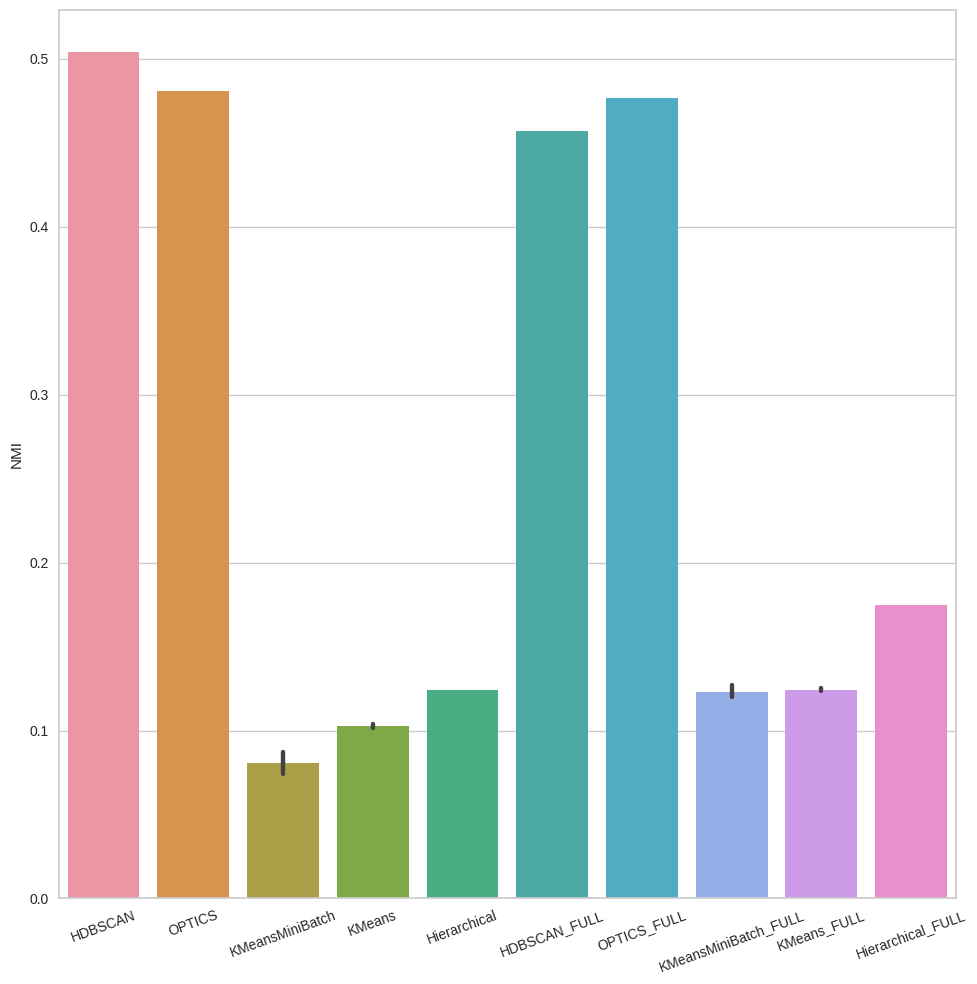

In [139]:
labels, data = [*zip(*algorithm_nmi_dictionary.items())]

plt.figure(figsize=(10, 10))
sns.barplot(data=data)
plt.ylabel('NMI')
plt.xticks(range(0, len(labels)), labels, rotation=20, ha='center')
plt.tight_layout()
plt.savefig('barplot1.png')
plt.show()

In [142]:
predictions = clustering.perform_hdbscan(reg_points_red)

In [159]:
subset_points = reg_points_red[::3]
subset_labels = labels[::3]
subset_pred = predictions[::3]                                                                                                                                                                                                         

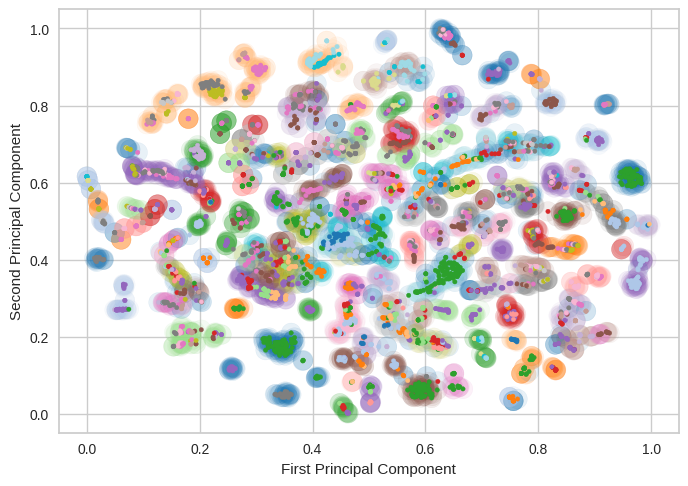

In [168]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
ax.scatter(subset_points[:, 0], subset_points[:, 1], c=subset_pred, cmap='tab20', alpha=0.1, s=200)
ax.scatter(subset_points[:, 0], subset_points[:, 1], c=subset_labels, cmap='tab20', alpha=1, s=10)
plt.savefig('vis1.png')
plt.show()